# Take Home Challenge #2

## Goal: Identify which factors predict future user adoption

## Load packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import chardet
%matplotlib inline
import  warnings
warnings.simplefilter('ignore')

## Load data

In [6]:
#find file encoding type
with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7298523315812625, 'language': ''}


In [13]:
#display info
pd.set_option('display.max_columns', None)
#read in 'users' file
users = pd.read_csv('takehome_users.csv', 
                    parse_dates=['creation_time'], 
                    encoding=result['encoding'], na_values=['n/a', 'na', '-', '*'])
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [12]:
#read in 'engagement' file
engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp']) 
                    
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


## Data Exploration

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


There are 12000 entries and 10 features. There is a mix of dtypes.

In [15]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


There are 207,917 entries and 3 features. There are two dtypes: datetime and int.

## Null Values

In [16]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [17]:
engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

There are two features in the users dataframe that contain null values: `last_session_creation_time` and `invited_by_user_id`. There are no null observations within the engagement dataframe.

Since the case study overview for the feature `invited_by_user_id` describes it with the clause "if applicable", we will fill these missing values in with zero to represent the binary encoding of "No".

As for `last_session_creation_time` the case study overview describes it as a unix timestamp of last login. Therefore, it will be converted to a datetime object and fill its missing values with the timestamp of when the account was created using feature `creation_time`.

In [18]:
#handling null values in `invited_by_user_id`
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

#converting `last_session_creation_time` to a datetime object
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

#handling null values in `last_session_creation_time`
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['creation_time'])

# Data Wrangling

The caset study overview states users who have logged into the product on three seperate days in at least one seven-day period are defined as an "adopted user". Therefore, let's determine who in the datasets are adopted users. To do, let's first create a variable referring to 7days.

In [22]:
#create column for the rolling count
def rolling_count(df, freq):
    return df.rolling(freq, on='time_stamp')['visited'].count()

engagement['visited_7days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, freq='7D')

engagement

,time_stamp,user_id,visited,visited_7days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [23]:
engagement.user_id.nunique()

8823

There are a total of 8823 engaged users. 

So now,let's find how many of these engaged users are adopted users. This will be engaged users that have visited at least 3 times or more in the seven days.

In [24]:
adopted = engagement.loc[(engagement['visited_7days'] >= 3)]
adopted.user_id.nunique()

time_stamp       160034
user_id            1602
visited               1
visited_7days         5
dtype: int64

There are a total of 1602 adopted users. So now, let's create a column for `adopted_users` in the user dataframe and use boolean encoding to identify who is "TRUE" and isn't "False" an adopted user.

In [26]:
#remove dups
adopted = adopted.drop_duplicates('user_id', keep = 'first')

#create new column in user df
adoptedID = adopted.user_id.tolist()
users['adopted_users'] = users['object_id'].isin(adoptedID)

users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,False


## Potentially Useful Features

In [41]:
#feat representing user consistency
users['user_history'] = users['last_session_creation_time'] - users['creation_time']
#convert timedelta64[ns] to int
users['user_history'] = users['user_history'].dt.components.days

In [43]:
#feat representing # of times user gained referrals thru opened accounts
df = pd.DataFrame(users.invited_by_user_id.value_counts()).reset_index()
df.columns=['object_id', 'num_referrals']
users = users.merge(df, how='left', on='object_id')
users['num_referrals'] = users['num_referrals'].fillna(0)

In [57]:
#feat representing email domain
users['email_domain'] = [x.split('@')[1] for x in users.email]
top = users.email_domain.value_counts().index[:5] # top 5 domains
users['email_domain'] = [x if x in top else "other" for x in users.email_domain]

AttributeError: 'DataFrame' object has no attribute 'email'

In [59]:
users = users.drop(['email'],axis=1)
users

,object_id,creation_time,name,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,user_history,num_referrals,email_domain
0,1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,0,0.0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,136,0.0,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,0,1.0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,1,0.0,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,5,0.0,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,False,0,0.0,gustr.com
11996,11997,2013-01-10 18:28:37,Fisher Amelie,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,False,5,1.0,gmail.com
11997,11998,2014-04-27 12:45:16,Haynes Jake,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,False,0,0.0,cuvox.de
11998,11999,2012-05-31 11:55:59,Faber Annett,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,False,2,7.0,other


Now, our dataset is 12,000 rows with 13 features.

# Exploratory Data Analysis

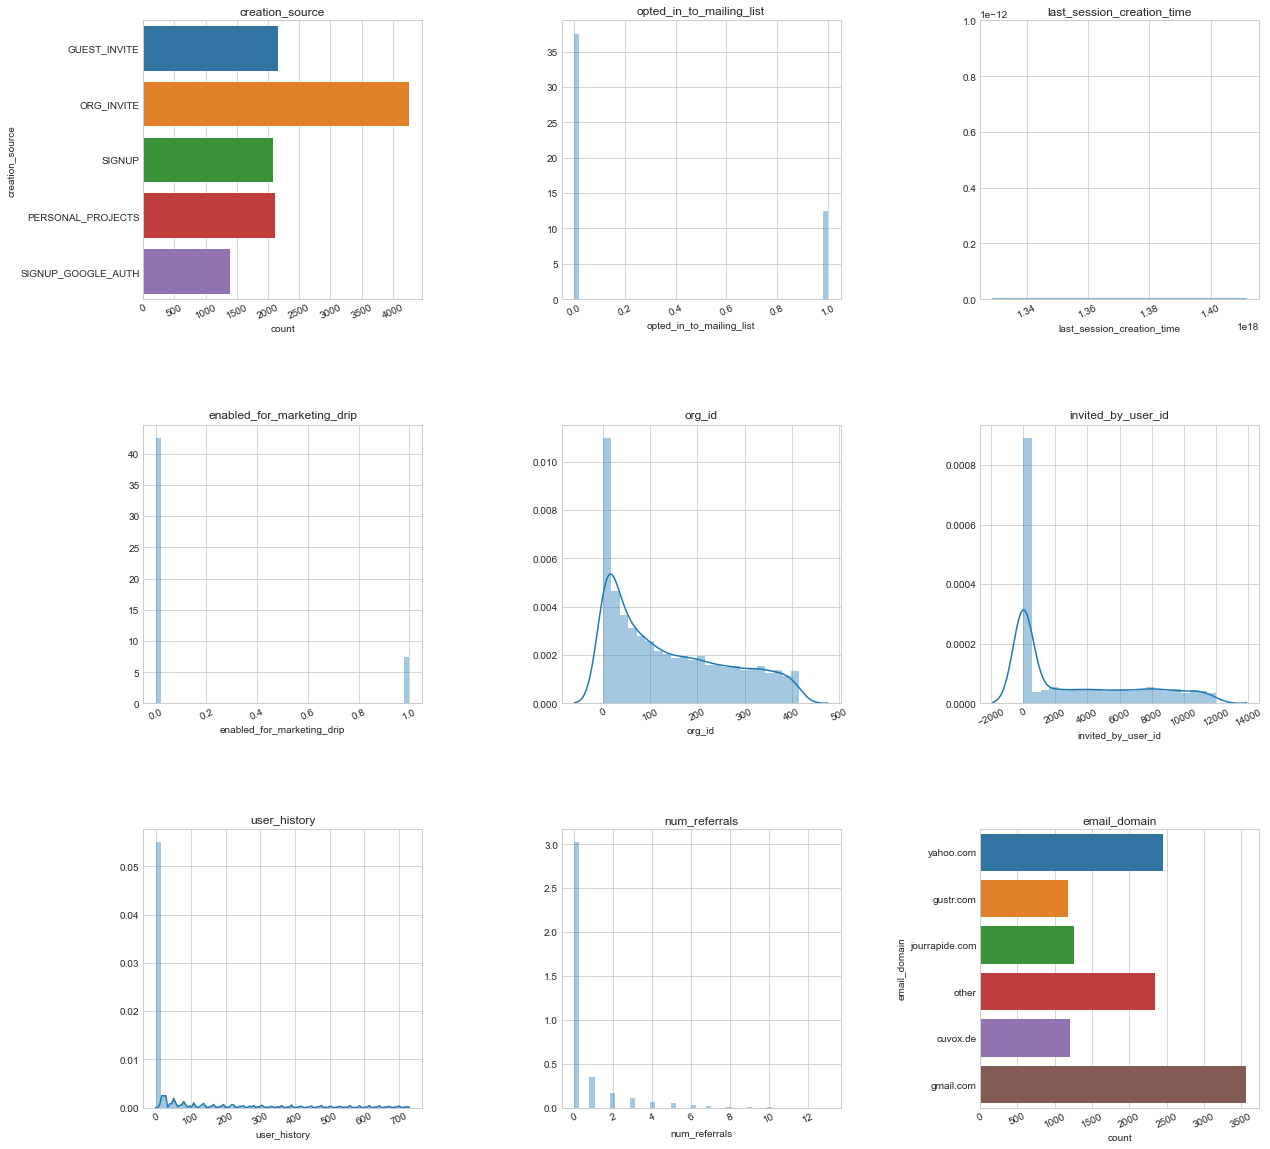

In [60]:
columns = ['creation_source', 'opted_in_to_mailing_list','last_session_creation_time', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
                'user_history', 'num_referrals','email_domain']

def plot_dist(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: #Categorical
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else: #Numerical
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_dist(users[columns], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

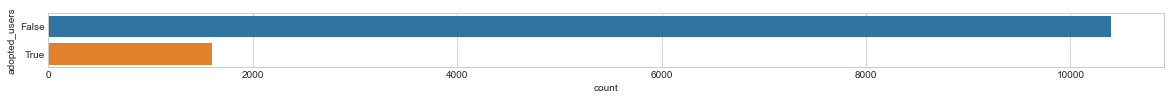

In [28]:
#distribution of target feature
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y="adopted_users", data=users);

## Feature Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

no_cols = ['object_id', 'creation_time', 'name','last_session_creation_time', 
                    'org_id', 'invited_by_user_id', 'adopted_users']
                
y = users.adopted_users
X = users.drop(no_cols, axis=1)

In [62]:
categ_mask = X.dtypes==np.object
categ_cols = X.columns[categ_mask].tolist()

In [63]:
#encode categorical feats
X_encoded = pd.get_dummies(X, columns = categ_cols, prefix_sep='_', drop_first=True) 

In [64]:
#DictVectorizer
from sklearn.feature_extraction import DictVectorizer
X_dict = X.to_dict(orient='records') # turn each row as key-value pairs
DV_X = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix
# apply dv_X on X_dict
encoded_dv = DV_X.fit_transform(X_dict)
print(encoded_dv)

[[  1.   0.   0. ...   0.   1.   0.]
 [  0.   1.   0. ...   0.   0. 136.]
 [  0.   1.   0. ...   1.   0.   0.]
 ...
 [  1.   0.   0. ...   0.   1.   0.]
 [  0.   0.   1. ...   7.   0.   2.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [65]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  12000 non-null  datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   adopted_users               12000 non-null  bool          
 10  user_history                12000 non-null  int64         
 11  num_referrals               12000 non-null  float64   

In [80]:
X = X_encoded

,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history,num_referrals,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_domain_gmail.com,email_domain_gustr.com,email_domain_jourrapide.com,email_domain_other,email_domain_yahoo.com
0,1,0,0,0.0,0,0,0,0,0,0,0,0,1
1,0,0,136,0.0,1,0,0,0,0,1,0,0,0
2,0,0,0,1.0,1,0,0,0,0,1,0,0,0
3,0,0,1,0.0,0,0,0,0,0,0,0,0,1
4,0,0,5,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0.0,1,0,0,0,0,1,0,0,0
11996,0,0,5,1.0,0,0,0,1,1,0,0,0,0
11997,1,1,0,0.0,0,0,0,0,0,0,0,0,0
11998,0,0,2,7.0,0,1,0,0,0,0,0,1,0


## Feature Selection

Feature ranking:
1. feature 2 (0.95)
2. feature 3 (0.01)
3. feature 0 (0.00)
4. feature 5 (0.00)
5. feature 1 (0.00)
6. feature 4 (0.00)
7. feature 6 (0.00)
8. feature 11 (0.00)
9. feature 8 (0.00)
10. feature 12 (0.00)
11. feature 10 (0.00)
12. feature 9 (0.00)
13. feature 7 (0.00)


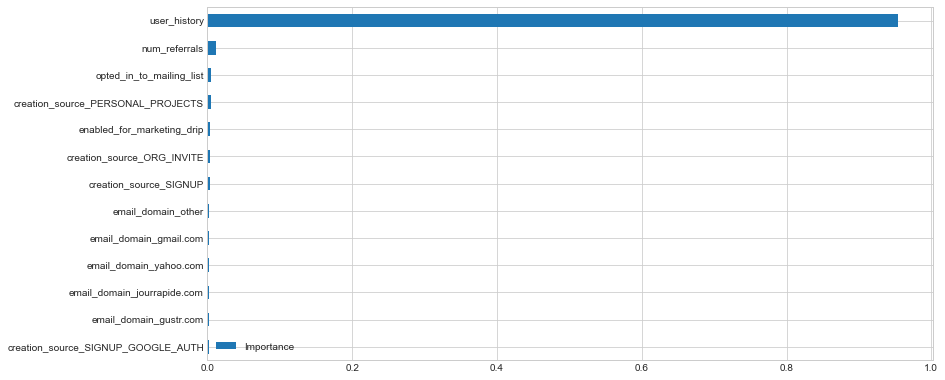

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf.fit(X, y)

plt.style.use('seaborn-whitegrid')
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importances[indices[f]]))

df_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
df_importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(13,len(importances)/2));

Feature ranking:
1. feature 2 (0.96)
2. feature 3 (0.01)
3. feature 0 (0.00)
4. feature 5 (0.00)
5. feature 1 (0.00)
6. feature 4 (0.00)
7. feature 6 (0.00)
8. feature 11 (0.00)
9. feature 8 (0.00)
10. feature 12 (0.00)
11. feature 10 (0.00)
12. feature 9 (0.00)
13. feature 7 (0.00)


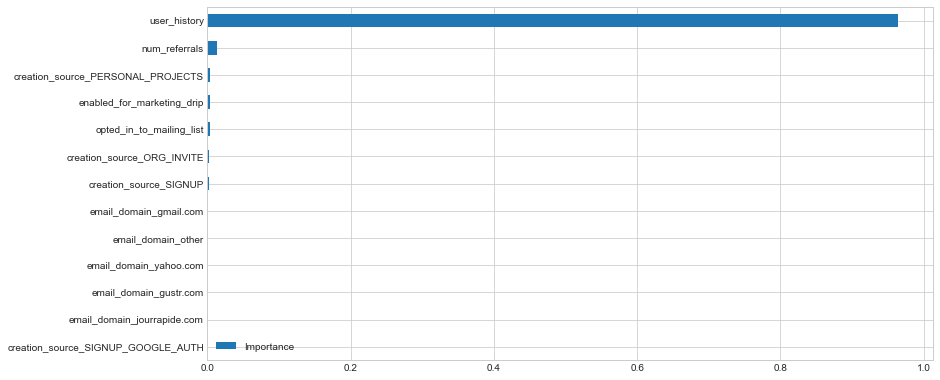

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

etclf = ExtraTreesClassifier(n_estimators=100)
etclf.fit(X,y)

importance_etclf = etclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importance_etclf[indices[f]]))

df_importance_etclf = pd.DataFrame(importance_etclf, index=X.columns, columns=["Importance"])
df_importance_etclf.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(13,len(importance_etclf)/2));

We see the results of the order of important features is same in both tree based classifiers.

## Feature Correlation

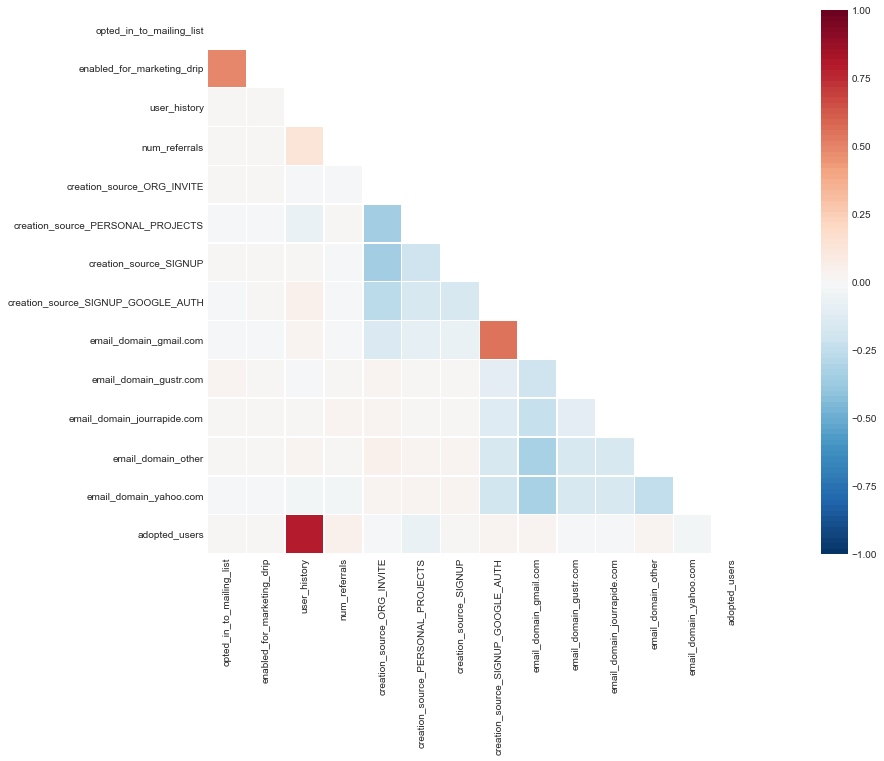

In [73]:
corr_ = pd.concat([X,y], axis=1)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

mask = np.zeros_like(corr_.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

## Modeling

In [75]:
#train/test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 50}
Best average precision was 0.9658333333333333


In [77]:
#evluation of the model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=50
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9675
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      3114
        True       0.88      0.88      0.88       486

    accuracy                           0.97      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.97      0.97      0.97      3600



In [78]:
#feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

user_history                          0.944404
num_referrals                         0.013694
creation_source_PERSONAL_PROJECTS     0.009108
opted_in_to_mailing_list              0.005304
enabled_for_marketing_drip            0.004301
creation_source_ORG_INVITE            0.003998
creation_source_SIGNUP                0.003301
email_domain_yahoo.com                0.003267
email_domain_gmail.com                0.003032
email_domain_other                    0.002805
email_domain_jourrapide.com           0.002460
email_domain_gustr.com                0.002309
creation_source_SIGNUP_GOOGLE_AUTH    0.002016
dtype: float64


# Conclusion

We can see from the feature importance output that the most significant factor in predicting future user adoption is `user_history` which represents a user's consistency on the software. As a result, a recommendation of how to effectively grow user adoption is to reward current users, especially those with older accounts, after they have logged-in and used the software. The next important feature is `num_referrals` which refers to the number of people a user has succesfully gotten new users to open an account. As a result, a referral reward would prove to be encouraging to users, especially if those users with high numbers of referrals already are targeted first.